<h1 style='color:blue'> House Price Prediction Using Machine Learning</h1>

The main Contents in this notebook are

* Data Ingestion
* Exploratory Data Analysis (EDA) and Feature Engineering
* Data Preparation (Encoding and Scaling)
* Modelling (Hyper parameter tuning. stacing and ensambling)
* Making Predictions

In [367]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [396]:
#importing the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [397]:
#create copy of train data for data exploration throughout this notebook
train_original = train[:]

In [398]:
train = train.set_index('Id')
ID= test[['Id']]
test = test.set_index('Id')

### Exploratory Data Analysis (EDA)

Firstly, We use EDA to understand the data and find some of the hidden pattern in it, so that we can be sure that the data is ready to be passed into Machine Learning model.

We perform following task in this section:
* understand problem by looking at some important variables
* Univariate, Bivariate and Multivariate analysis
* Handling missing values, Outliers and categorical data

In [399]:
#check the number of features and observations
print("Train: {}".format(train.shape))
print("Test: {}".format(test.shape))

Train: (1460, 80)
Test: (1459, 79)


In [400]:
#check the data type with counts
train.dtypes.value_counts()

object     43
int64      34
float64     3
dtype: int64

In [373]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [127]:
train.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [128]:
#displaying the columns
categorical_features = train.select_dtypes('object')
categorical_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [129]:
numeric_features = train.select_dtypes('number')
numeric_features.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [130]:
#see the data information
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


EDA is an iterative process which helps us throughout the data science life cycle. It can be very handy to explore and understand data and perform feature engineering side by side.

Firstly we will look at our target variable and try to understand about it

In [175]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

From the above information we can see that minimum value is greater than 0 and all the values seems quite reasonable, now lets look at the distribution of the salesprice.

In [401]:
import scipy.stats as st

#function to plot distribution and probability plot
def show_dist(label):
    ax =sns.distplot(label, fit=st.norm)
    ax.set_title("Skewness: {}".format(label.skew()))
    fig = plt.figure()
    res = st.probplot(label, plot = plt)

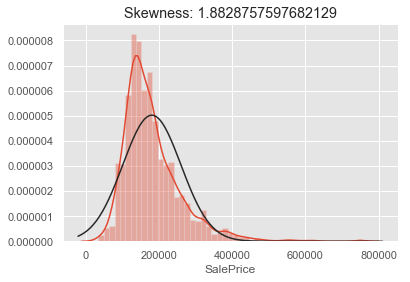

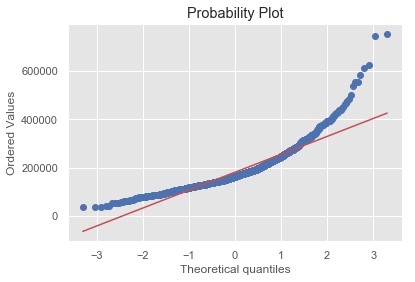

In [402]:
show_dist(train_original.SalePrice)

We can see that Saleprice is not normal and is positively skewed. We can perform data transformation to fix this problem. Meanwhile we are also keeping the original value for now for futher analysis

In [403]:
#applying log transformation
train.SalePrice = np.log(train.SalePrice)

In [404]:
train.SalePrice.describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

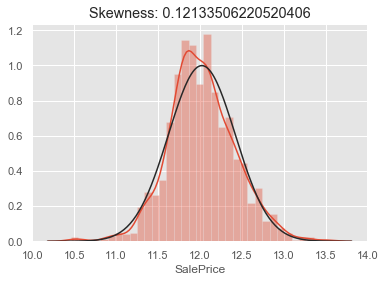

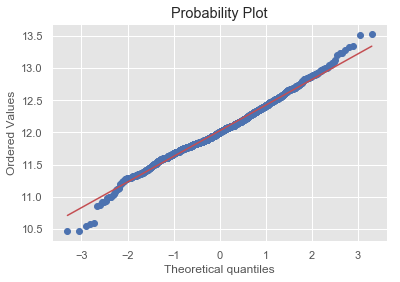

In [405]:
show_dist(train.SalePrice)

The target variable has been normalized.

#### Hypothesis Generation

Hypothesis generation helps us to point out the factors which might affect our Target variable. Below are some of the hypothesis which I think can affect the SalePrice.

1. GroundLivingArea (GrLivArea) and TotalBsmtSF will be directly proportional to the price of the house. 
2. The SalePrice will be high for better OverallQuality.
3. SalesPrice will be high for the hoses built recently.
4. SalePrice of House will be high on more popular Neighborhood.

Lets check our assuptions one by one and understand data more properly using <b>bivariate analysis </b>

In [379]:
#scater plot
plt.style.use('ggplot')
def show_scatter(var):
    sns.scatterplot(x = var, y = 'SalePrice', data = train_original)
    plt.show()

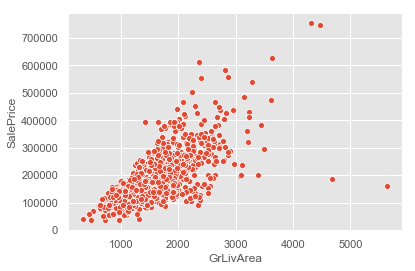

In [137]:
show_scatter('GrLivArea')

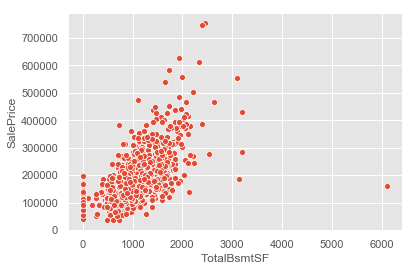

In [138]:
show_scatter('TotalBsmtSF')

We can see that there is a linear relationship between GrLivArea and SalePrice and also between totalbsmtsf and saleprice. which validates our hypothesis. 

In [139]:
def show_box(var):
    fig = sns.boxplot(x=var, y='SalePrice', data = train_original)
    fig.axis(ymin =0, ymax = 800000)

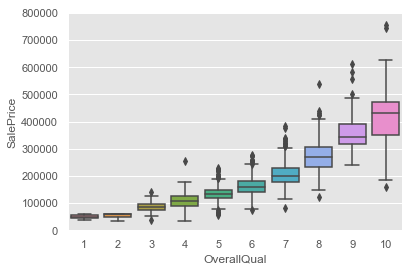

In [140]:
show_box('OverallQual')

Better the overallQual higher the price, which validates our second hypothesis as well.

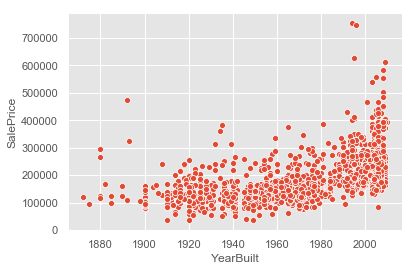

In [141]:
#hypothesis for yrbuilt
show_scatter('YearBuilt')

The relationship doesnot seem too strong, however, houses built recently usually tends to be more expensive.

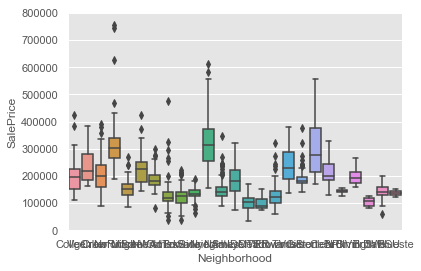

In [142]:
#relation with neighbourhood
show_box('Neighborhood')

Price of some houses in some neighborhood are higher where as other are lower.we can be more clear about it later.

#### Missing Data

Before having a futher look at data, we first try to see the null values and deal with them

In [406]:
#returns table with missing data info
def null_info(df):
    missing_table = pd.DataFrame(df.isnull().sum().sort_values(ascending = False), columns = ['total'])
    missing_table['percent'] = missing_table['total'].apply(lambda x:round(x/len(df)*100,2))
    return missing_table

In [407]:
#visualize null value 
def visualize_nulls(df):
    sns.heatmap(df.isnull(), cbar=False, yticklabels=False)

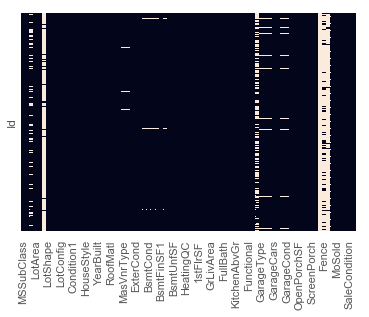

In [408]:
visualize_nulls(train)

In [409]:
print('=====================================')
print('=====================================')
missing_train = null_info(train).head(10)
print(missing_train)
print('=====================================')
missing_test = null_info(test).head(10)
print(missing_test)
print('=====================================')
print('=====================================')

              total  percent
PoolQC         1453    99.52
MiscFeature    1406    96.30
Alley          1369    93.77
Fence          1179    80.75
FireplaceQu     690    47.26
LotFrontage     259    17.74
GarageType       81     5.55
GarageCond       81     5.55
GarageFinish     81     5.55
GarageQual       81     5.55
              total  percent
PoolQC         1456    99.79
MiscFeature    1408    96.50
Alley          1352    92.67
Fence          1169    80.12
FireplaceQu     730    50.03
LotFrontage     227    15.56
GarageCond       78     5.35
GarageFinish     78     5.35
GarageYrBlt      78     5.35
GarageQual       78     5.35


We can see that there are some values with too many missing values. These features will obviously not give much information and are more likely to act as outliers so, we can safely drop these features.

In [410]:
train.shape, test.shape

((1460, 80), (1459, 79))

In [411]:
#dropping features with more than 75% of null values
train = train.drop((missing_train[missing_train.percent > 75]).index, 1)
test = test.drop((missing_test[missing_test.percent > 75]).index, 1)
train.shape, test.shape

((1460, 76), (1459, 75))

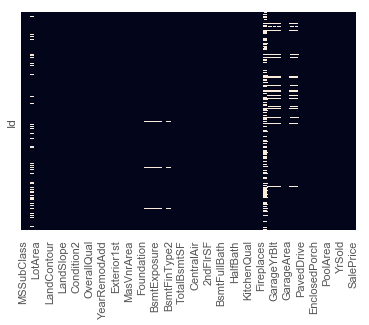

In [412]:
visualize_nulls(train)

Features with most of the null values has been removed, however, there are still null values present int he data. We perform imputation for them based on their category.

In [413]:
target = train.SalePrice
train = train.drop(['SalePrice'], axis =1)
categorical_features = train.select_dtypes('object')
numerical_features = train.select_dtypes('number')

In [414]:
# checking number of categorical features and numeric
print('Categorical Features: {}'.format(len(categorical_features.columns)))
print('Numeric Features: {}'.format(len(numerical_features.columns)))

Categorical Features: 39
Numeric Features: 36


In [415]:
#function to fill missing values for categories
def handle_categorical(multcolumns, df):
    copy = pd.DataFrame()
    i = 0
    for field in multcolumns:
        temp = df[field].fillna(df[field].mode()[0])
        df.drop([field], axis = 1, inplace = True)
        
        if i == 0:
            copy = temp.copy()
        else:
            copy = pd.concat([copy,temp], axis=1)
            
        i += 1
    
    copy = pd.concat([df, copy], axis=1)
    return copy

In [416]:
#function to fill numeric values 
def handle_numeric(multcolumns, df):
    copy = pd.DataFrame()
    i = 0
    
    for field in multcolumns:
        temp = df[field].fillna(df[field].mean())
        df.drop([field], axis=1, inplace = True)
        
        if i == 0:
            copy = temp.copy()
        else:
            copy = pd.concat([copy, temp], axis=1)
        
        i += 1
    copy = pd.concat([df, copy], axis = 1)
    return copy

In [417]:
train = handle_categorical(categorical_features.columns,train)
test = handle_categorical(categorical_features.columns,test)

In [418]:
train = handle_numeric(numerical_features.columns, train)
test = handle_numeric(numerical_features.columns, test)

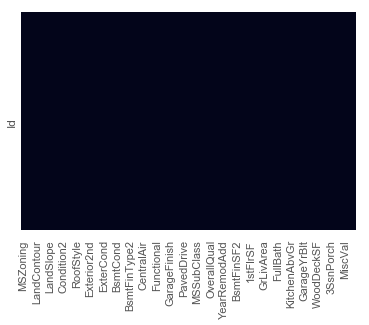

In [419]:
visualize_nulls(train)

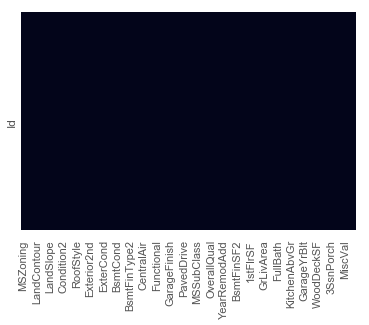

In [420]:
visualize_nulls(test)

Finally we have fixed the problem of missing values for both the dataframes. Now for conistency we will concat both the dataframes train and test for them and perform various fixes on them to make sure that they have equal number of columns. Finally during the modeling we will split those datasets into test and train again.
For further exploration we will use our train_original dataset.

In [421]:
#append the target to train back again
train['SalePrice'] = target

In [422]:
train.shape, test.shape, len(target)

((1460, 76), (1459, 75), 1460)

#### Back To EDA

Now lets look at the correlation matrix and see the most correlated features.

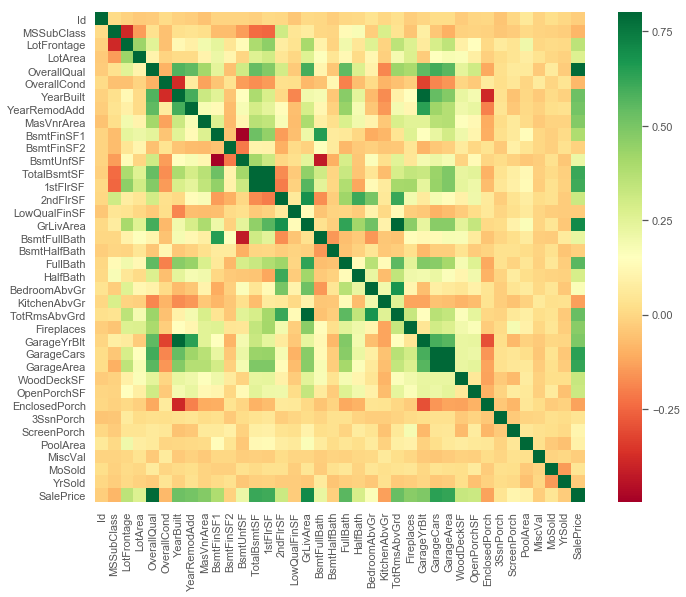

In [159]:
#Correlation matrix
corrmat = train_original.corr()
plt.figure(figsize = (12,9))
sns.heatmap(corrmat, vmax=.8, square = True, cmap='RdYlGn')

From the above heatmap, we can see that there are various features having strong correlation with the SalePrice. Similarly, several features have high correlation among themselves which raise the doubt of multicollinearity. These features are more likely to give same kind of information.

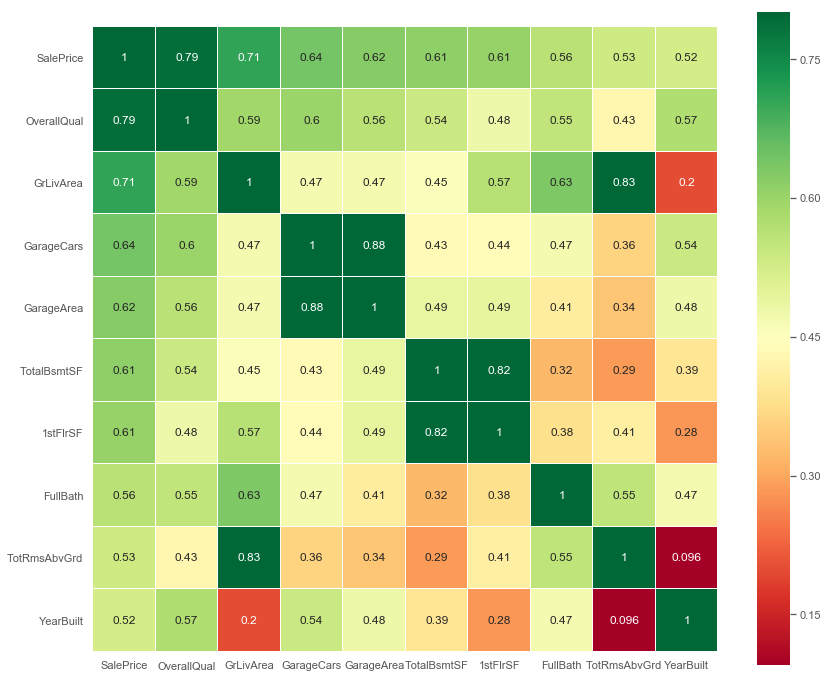

In [160]:
#Saleprice correlation matrix( Zoomed heatmap style)
top_features=corrmat.nlargest(10, 'SalePrice')['SalePrice']
cols = top_features.index
cm = np.corrcoef(train_original[cols].values.T)
plt.figure(figsize = (14,12))
sns.heatmap(cm, vmax=0.8, square=True, annot=True, linewidths=0.01, linecolor='white', xticklabels=cols.values, yticklabels=cols.values, annot_kws = {'size':12}, cmap='RdYlGn')
plt.show()

From the above zoomed heatmap we can spot couple of things.

* OverallQual, GrLivArea and TotalBsmtSF are strongly correlated with saleprice.
* GarageArea and Garaage are strongly correlated with saleprice, but number of cars that fit into the garage is the consequence fo garage area, so they are like twin brother and we need just one variable. We can keep garage cars as its correlation with saleprice is much higher.
* TotalBsmtSF and 1stFloor seems to be twinbrother as well and this totally makes same.
* Similarly, TotalRmsbvGrd and GrLivArea also looks like twin brother.

####  Collinear Variables
we look for any variables that have correlation greater than 0.8 with other variables

In [424]:
#set the threshold
threshold = 0.8

#Empty dictionary to hold correlated variables
above_threshold_vars= {}

#for each column, record the variables that are above the threshold
for col in corrmat:
    above_threshold_vars[col] = list(corrmat.index[corrmat[col]>threshold])

For each of these pairs of highly correlated variables, we only want to remove one of the variables.

In [425]:
above_threshold_vars

{'Id': ['Id'],
 'MSSubClass': ['MSSubClass'],
 'LotFrontage': ['LotFrontage'],
 'LotArea': ['LotArea'],
 'OverallQual': ['OverallQual'],
 'OverallCond': ['OverallCond'],
 'YearBuilt': ['YearBuilt', 'GarageYrBlt'],
 'YearRemodAdd': ['YearRemodAdd'],
 'MasVnrArea': ['MasVnrArea'],
 'BsmtFinSF1': ['BsmtFinSF1'],
 'BsmtFinSF2': ['BsmtFinSF2'],
 'BsmtUnfSF': ['BsmtUnfSF'],
 'TotalBsmtSF': ['TotalBsmtSF', '1stFlrSF'],
 '1stFlrSF': ['TotalBsmtSF', '1stFlrSF'],
 '2ndFlrSF': ['2ndFlrSF'],
 'LowQualFinSF': ['LowQualFinSF'],
 'GrLivArea': ['GrLivArea', 'TotRmsAbvGrd'],
 'BsmtFullBath': ['BsmtFullBath'],
 'BsmtHalfBath': ['BsmtHalfBath'],
 'FullBath': ['FullBath'],
 'HalfBath': ['HalfBath'],
 'BedroomAbvGr': ['BedroomAbvGr'],
 'KitchenAbvGr': ['KitchenAbvGr'],
 'TotRmsAbvGrd': ['GrLivArea', 'TotRmsAbvGrd'],
 'Fireplaces': ['Fireplaces'],
 'GarageYrBlt': ['YearBuilt', 'GarageYrBlt'],
 'GarageCars': ['GarageCars', 'GarageArea'],
 'GarageArea': ['GarageCars', 'GarageArea'],
 'WoodDeckSF': ['WoodDeckS

In [426]:
#track columns to remove and columns already examined
cols_to_remove = []
cols_seen = []
cols_to_remove_pair = []

#Iterate through columns and correlated columns
for key, value in above_threshold_vars.items():
    #keep track of columns already examined
    cols_seen.append(key)
    for x in value:
        if x == key:
            next
        else:
            #only want to remove one in a pair
            if x not in cols_seen:
                cols_to_remove.append(x)
                cols_to_remove_pair.append(x)
                
cols_to_remove = list(set(cols_to_remove))
print('Number of columns to remove: {}'.format(len(cols_to_remove)))

Number of columns to remove: 4


So there are 4 columns that we can remove to tackle the problem of multicollinearity.

In [427]:
train.shape, test.shape

((1460, 76), (1459, 75))

In [428]:
train = train.drop(columns = cols_to_remove)
test = test.drop(columns = cols_to_remove)
train.shape, test.shape

((1460, 72), (1459, 71))

#### Multivariate Analysis

Using pairplot for multivariate analysis This method is very handy to see the relation between the various features themselves and also to spot the outliers.

In [429]:
featureList = list(cols)

In [430]:
new_feature = [ele for ele in featureList if ele not in cols_to_remove]

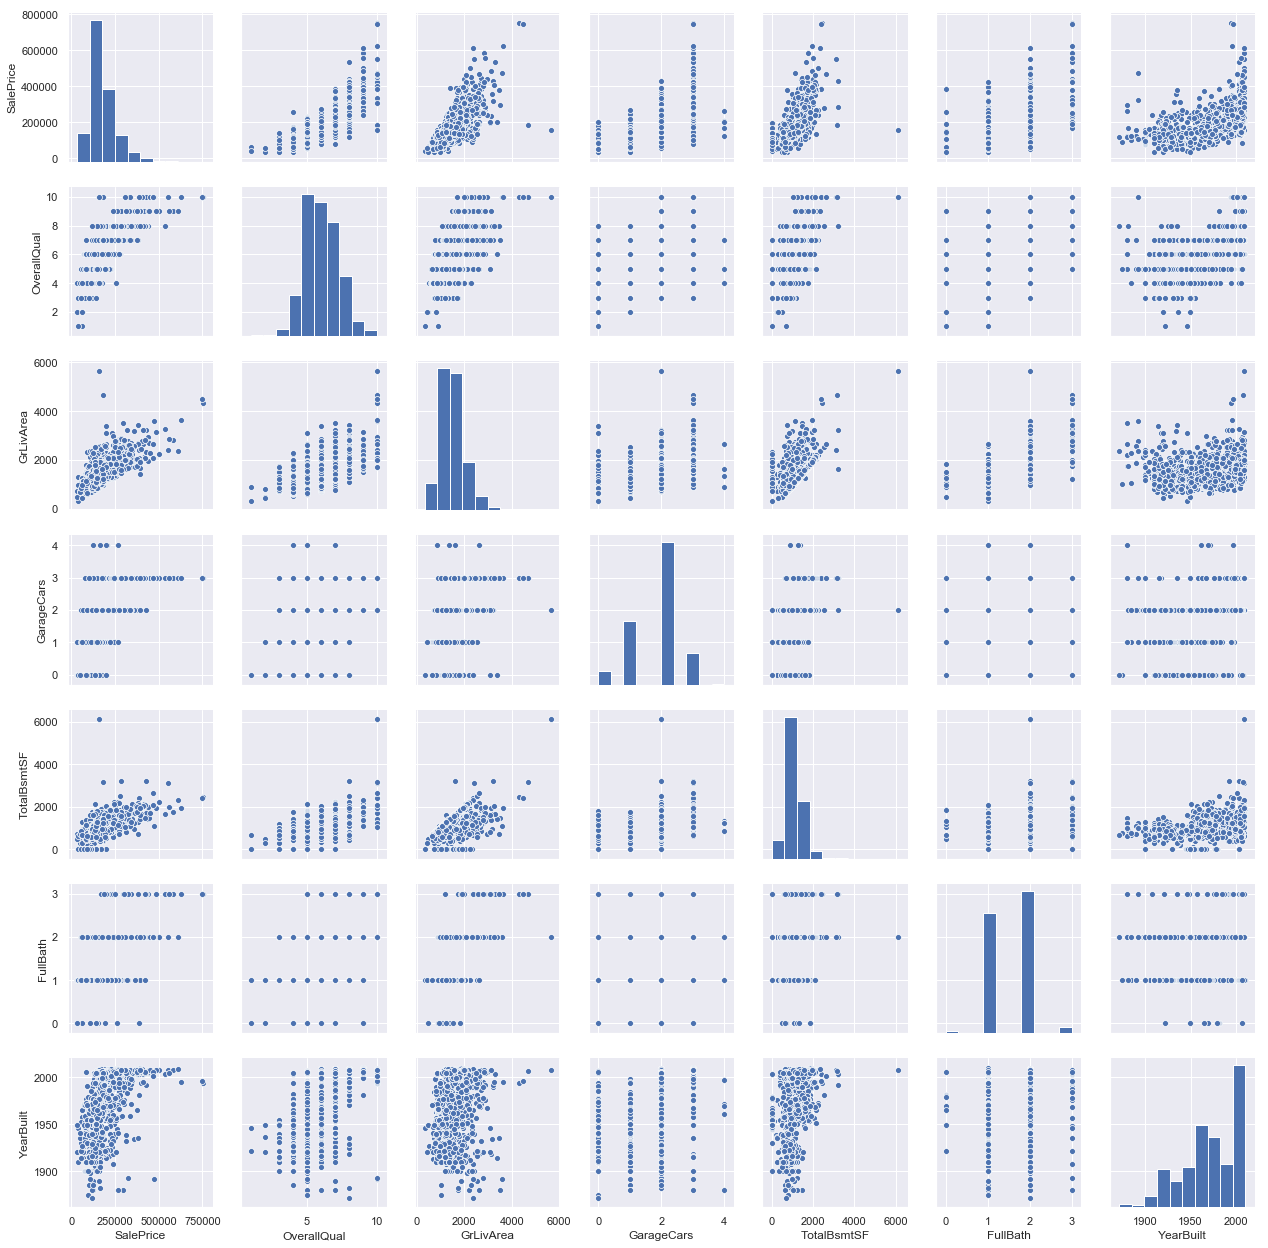

In [431]:
sns.set()
sns.pairplot(train_original[new_feature], size=2.5)
plt.show()

The mega scatter plot gives us some important information.

Area that is giving import information is between totalbsmtsf and GrLivArea, they seem to have a linear relationship as discussed before. Similarly Yearbuilt and Sale Price appears to be a shy exponential function.

Meanwhile we can also see some outliers in the above graph clearly. We can perform Bivariate Analysis to have a closer look on those outliers

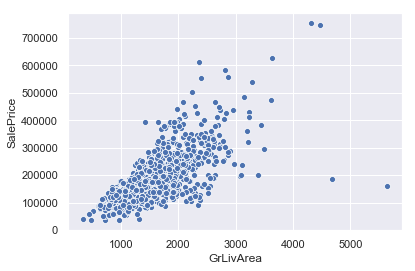

In [432]:
show_scatter('GrLivArea')

From the above graph we can see that there are two bigger points on the lower left and they seems to be like an outlier, the upper two points are following the trend so they are less likely to be an outlier

In [434]:
train.shape, test.shape

((1460, 72), (1459, 71))

In [435]:
#deleting the points
train = train[train['GrLivArea'] < 4600]
test = test[test['GrLivArea'] < 4600]

train.shape, test.shape

((1458, 72), (1458, 71))

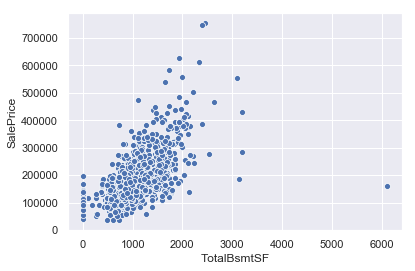

In [436]:
#bivariate analysis of totalbsmtsf
show_scatter('TotalBsmtSF')

In [437]:
train = train[train['TotalBsmtSF'] < 4000]
test = test[test['TotalBsmtSF'] < 4000]

train.shape, test.shape

((1458, 72), (1458, 71))

Now, we have sucessfully handled missing values, collinear values and outliers. Now lets do some Univariate Analysis to check distribution of the other fields. 

#### Handling Skew for rest of the data

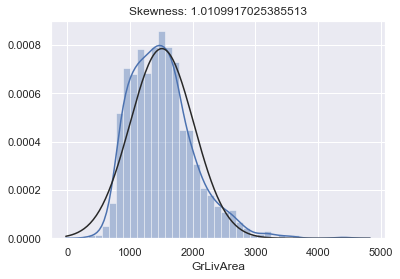

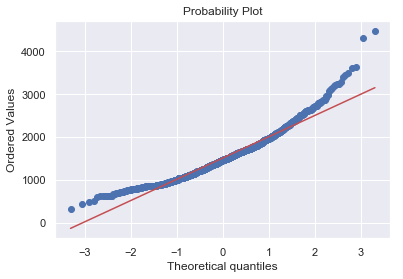

In [438]:
show_dist(train.GrLivArea)

We can see that the above field is skewed so we try to fix or simply reduce the skewness of the fields. The data is said to be perfectly symmentrical if skewness is 0 but this is unlikely for real world data. So If the skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

In [439]:
#functiion to normalize 

def correct_skew(df):
    #columns candidates of skew (-0.5 to 0.5)
    cols = df.select_dtypes('number').columns
    skew_df = [col for col in df[cols].columns if (abs(df[col].skew())>0.5)]
    print(len(skew_df))
    
    #function to correct skew:
    def skewfix(data, data2):
        for i in data2:
            data[i] = np.log1p(data[i])

        return data
        
    return skewfix(df, skew_df)


In [440]:
train = correct_skew(train)

26


In [441]:
test = correct_skew(test)

23


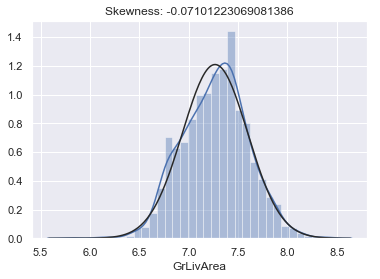

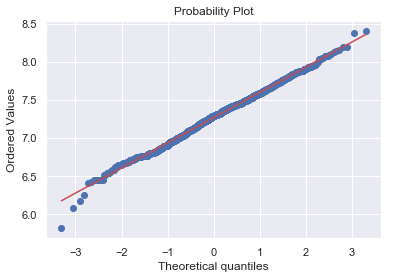

In [442]:
show_dist(train.GrLivArea)

The distribution looks acceptable now.

#### Handling categorical Variables

Now lets move forward and handle the categorical Features by encoding those values. For consistency we will concat the train and test dataset and which we will concat later on for consistency

In [444]:
train.shape, test.shape

((1458, 72), (1458, 71))

In [449]:
target = train.SalePrice
train = train.drop(['SalePrice'], axis = 1)

In [451]:
train.shape, test.shape, len(target)

((1458, 71), (1458, 71), 1458)

In [452]:
final_df = pd.concat([train, test], axis=0)

In [453]:
final_df.dtypes.value_counts()

object     39
float64    27
int64       5
dtype: int64

Now lets look at the number of unique entries in each of the categorical columns:

In [454]:
#Number of unique classes in each object column
final_df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          7
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64

Here we can see that most of the categorical variables have relatively small numbers of unique entries only few of them have many categories. Now, we perform two types of encoding here, LabelEncoding and OneHotEncoding.

* LabelEncoding: This type of encoding doesnot create new columns so we will apply this for only those features with 2 categories.

* One-hot encoding: This type of encoding creates new columns and we use this for features having more than 2 categories.


In [455]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [456]:
def label_Encoding(df, multcolumns):
    count = 0
    
    #iterate through the columns
    for col in multcolumns:
        encoder.fit(df[col])
        df[col] = encoder.transform(df[col])
        
        #keep track of columns encoded
        count += 1
    print("Label encoded columns: {}".format(count))
        

In [457]:
def one_hot_encoding(df,multcolumns):
    copy = pd.DataFrame()
    i = 0
    for field in multcolumns:
        tmp = pd.get_dummies(df[field], drop_first=True)
        df.drop([field], axis = 1, inplace = True)
        if i == 0:
            copy = tmp.copy()
        else:
            copy = pd.concat([copy, tmp], axis = 1)
        i += 1
    
    copy = pd.concat([df, copy], axis = 1)
    return copy

In [339]:
def perform_encoding(df):
    le_list = []
    one_list = []
    cat_cols = list(df.select_dtypes('object').columns)
    for col in cat_cols:
        if len(list(df[col].unique())) <= 2:
            le_list.append(col)
        else:
            one_list.append(col)
    print("Label Encoder: ",len(le_list))
    print("One Encoder: ",len(one_list))

    df = one_hot_encoding(df, one_list)
    label_Encoding(df, le_list)

    return df


In [458]:
final_df.shape

(2916, 71)

In [459]:
final_df.head(2)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,2.0,0.000000,4.127134,0.0,0.0,0.0,0.0,0.0,2,2008
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,2.0,5.700444,0.000000,0.0,0.0,0.0,0.0,0.0,5,2007


In [460]:
final_df = perform_encoding(final_df)

Label Encoder:  3
One Encoder:  36
Label encoded columns: 3


In [461]:
final_df.head(2)

,Street,Utilities,CentralAir,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,1,0,1,4.110874,4.189655,9.042040,7,1.791759,7.602900,7.602900,...,0,0,0,0,1,0,0,0,1,0
2,1,0,1,3.044522,4.394449,9.169623,6,2.197225,7.589336,7.589336,...,0,0,0,0,1,0,0,0,1,0


Now we have more columns that is 231 from 71 after encoding, there must be some duplicated columns that needs to be removed.

In [462]:
final_df = final_df.loc[:,~final_df.columns.duplicated()]
final_df.shape

(2916, 172)

Now let's seperate back our train and test data 

In [464]:
df_train = final_df.iloc[:1458,:]
df_test = final_df.iloc[1458:,:]

In [467]:
df_train.shape, df_test.shape

((1458, 172), (1458, 172))

In [471]:
#free space by deleting unwanted variables
import gc
gc.enable()
del train_dup, train, test, train_original, final_df_dup, final_df
gc.collect()

216699

### Modelling

Now we take our df_train and fit the model on it and at last we make predictions on df_test

In [476]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_train, target, test_size = 0.25, random_state = 42)

We have used five models and the best parameters are choosen using Hyper Parameter tuning with GridSearch CV:
1. Light GBM
2. XGBoost
3. Gradient Boost
4. K-Nearest Neighbors
5. Random Forest

In [478]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import datetime

#### 1. Light GBM

In [479]:
from lightgbm import LGBMRegressor
print('#############################\n{}\tLightGBM'.format(datetime.datetime.now().strftime('%H:%M')))

parameters = {
    'objective':['regression'],
    'num_leaves':[5],
    'learning_rate':[0.05],
    'n_estimators':[720],
    'max_bin':[55],
    'max_depth':[2,3],
    'bagging_fraction':[.5,.8],
    'bagging_freq':[5],
    'bagging_seed':[9],
    'feature_fraction':[0.2319]
}

light = LGBMRegressor()
clf = GridSearchCV(light, parameters, verbose=0, iid=False)
clf.fit(X_train, y_train)

#############################
17:22	LightGBM


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=None,
                                     reg_alpha=0.0, reg_l...
                                     subsample_freq=0),
             iid=False, n_jobs=None,
             param_grid={'bagging_fraction': [0.5, 0.8], 'bagging_freq': [5],
                         'bagging_seed': [9], 'feature_fraction': [0.2319],
                         'learning_rate': [0.05], 'max_bin': [55],
                         'max_depth': [2, 3

In [480]:
lightgbm = LGBMRegressor(**clf.best_params_)
print('\nRegressor: \n', lightgbm, '\n')
print('{}\tDone!\n####################################################'
      .format(datetime.datetime.now().strftime('%H:%M')))


Regressor: 
 LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
              boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              feature_fraction=0.2319, importance_type='split',
              learning_rate=0.05, max_bin=55, max_depth=2, min_child_samples=20,
              min_child_weight=0.001, min_split_gain=0.0, n_estimators=720,
              n_jobs=-1, num_leaves=5, objective='regression',
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0) 

17:23	Done!
####################################################


#### 2. XGBOOST

In [482]:
from xgboost import XGBRegressor
print('####################################################\n{}\tXGBoost'
      .format(datetime.datetime.now().strftime('%H:%M')))
# hyper parameter optimization
learning_rate =[0.05,0.1,0.15,0.20]
max_depth = [2,3,5,10,15]
min_child_weight = [1,2,3,4]
n_estimators = [100,500,900,100,1500]
booster = ['gbtree','gblinear']
base_score = [0.25,0.5,0.75,1]

#define the grid of hyperparameters to search
hyperparameter_grid = {
    'colsample_bytree':[0.4],
    'gamma':[0.0],
    'learning_rate': learning_rate,
    'max_depth':max_depth,
    'min_child_weight':min_child_weight,
    'n_estimators':n_estimators,
    'seed':[36],
    'subsample':[0.2],
    'objective':['reg:squarederror'],
    'reg_alpha':[0.00006],
    'cale_pos_weight':[1],
    'booster': booster,
    'base_score': base_score
}
classifier = XGBRegressor()
random_cv = RandomizedSearchCV(estimator=classifier,
            param_distributions=hyperparameter_grid,
            cv = 5, n_iter=50, n_jobs=4,
            scoring='neg_mean_absolute_error',
            verbose = 5, return_train_score= True,
            random_state=42)

random_cv.fit(X_train, y_train)

####################################################
17:36	XGBoost
Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   25.1s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  3.9min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  6.3min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_st...
                                        'colsample_bytree': [0.4],
                                        'gamma': [0.0],
                                        'learning_rate': [0.05, 0.

In [485]:
XGBoost = XGBRegressor(**random_cv.best_params_)
print('{}\tDone!\n####################################################'
      .format(datetime.datetime.now().strftime('%H:%M')))

17:52	Done!
####################################################


#### 3. Gradient Boosting Regressor

In [486]:
from sklearn.ensemble import GradientBoostingRegressor
print('##############################################\n{}\tGradient Boost'.format(datetime.datetime.now().strftime('%H:%M')))

parameters= {
    'n_estimators':[8000],
    'learning_rate':[0.01],
    'max_depth':[2],
    'max_features':['sqrt'],
    'min_samples_leaf':[10],
    'min_samples_split':[5],
    'loss':['huber'],
    'random_state':[42]
}

gbr = GradientBoostingRegressor()
clf = GridSearchCV(gbr, parameters, verbose=0, iid = False)
clf.fit(X_train, y_train)
gbr = GradientBoostingRegressor(**clf.best_params_)

print('\nRegressor: \n', gbr, '\n')
print('{}\tDone!\n####################################################'
      .format(datetime.datetime.now().strftime('%H:%M')))

##############################################
17:56	Gradient Boost

Regressor: 
 GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='huber', max_depth=2,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=10, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=8000,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False) 

17:57	Done!
####################################################


#### 4. KNeighbours

In [487]:
from sklearn.neighbors import KNeighborsRegressor
print('####################################################\n{}\tK-nearest neighbor'
      .format(datetime.datetime.now().strftime('%H:%M:%S')))
parameters = {
    'algorithm': ['auto'],
    'leaf_size':[2,3,5,7],
    'weights':['uniform','distance'],
    'n_neighbors':[5,10],
    'metric':['euclidean','manhattan']
}

knn = KNeighborsRegressor()
clf = GridSearchCV(knn, parameters, verbose=0, iid = False)
clf.fit(X_train, y_train)
knn = KNeighborsRegressor(**clf.best_params_)
print('\nRegressor: \n', knn, '\n')
print('{}\tDone!\n####################################################'
      .format(datetime.datetime.now().strftime('%H:%M:%S')))

####################################################
19:08:32	K-nearest neighbor

Regressor: 
 KNeighborsRegressor(algorithm='auto', leaf_size=2, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='distance') 

19:08:49	Done!
####################################################


####  5. RandomForest Regressor

In [488]:
from sklearn.ensemble import RandomForestRegressor
print('####################################################\n{}\tRandom forest'
      .format(datetime.datetime.now().strftime('%H:%M:%S')))
parameters={
    'bootstrap':['auto'],
    'max_features':['auto'],
    'min_samples_leaf':[2],
    'min_samples_split':[4],
    'n_estimators': [1500],
    'n_jobs':[-1],
    'oob_score':[True]
}

r_forest = RandomForestRegressor()
clf = GridSearchCV(r_forest, parameters, verbose=0, iid = False)
clf.fit(X_train, y_train)
random_forest = RandomForestRegressor(**clf.best_params_)

print('\nRegressor: \n', random_forest, '\n')
print('{}\tDone!\n####################################################'
      .format(datetime.datetime.now().strftime('%H:%M:%S')))

####################################################
19:11:58	Random forest

Regressor: 
 RandomForestRegressor(bootstrap='auto', criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, n_estimators=1500,
                      n_jobs=-1, oob_score=True, random_state=None, verbose=0,
                      warm_start=False) 

19:12:46	Done!
####################################################


###  Model fitting and Evaluation

We will fit the models and use two evaluation metrics to measure their performance:

* RMSE (Root Mean Squared Error): Higher the value worse the model is.
* Coefficient of determination R2: It is hard to tell if our model is good by looking at absolute values of RMSE and MSE, so we can use this metric to measure how much our model is better than the constant baseline. It is going to be between - infinity and 1.  If R2 is negative the model is worse than predicting mean. A value close to 1 indicates a model with close to zero error.

In [496]:
from sklearn.metrics import r2_score, mean_squared_error

def evaluate_model(y_pred):
    r2_measure = r2_score(y_test, y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    return r2_measure, RMSE

In [554]:
def fit_models(models):
    #list to store performance of the models
    df_eval = pd.DataFrame()
    for key, value in models.items():
        print('Fitting: \t{}'.format(key))
        value.fit(np.array(X_train), np.array(y_train))
        y_pred = value.predict(np.array(X_test))
        r2, rmse = evaluate_model(y_pred)
        print('Done!')
        df_temp = pd.DataFrame({'model':[key],'rmse':[rmse], 'r2':[r2]})
        df_eval = df_eval.append(df_temp)
    
    print('=== Fitting Completed ! ====')
    return df_eval

In [555]:
#fitting the 5 models defined previously
models = {
    'lightgbm':lightgbm,
    'XGBoost':XGBoost,
    'GradientBoost':gbr,
    'KNN': knn,
    'Random Forest':r_forest
}

df_metric = fit_models(models)

Fitting: 	lightgbm
Done!
Fitting: 	XGBoost
Done!
Fitting: 	GradientBoost
Done!
Fitting: 	KNN
Done!
Fitting: 	Random Forest
Done!
=== Fitting Completed ! ====


In [556]:
df_metric

,model,rmse,r2
0,lightgbm,0.120685,0.910429
0,XGBoost,0.124339,0.904923
0,GradientBoost,0.118069,0.914270
0,KNN,0.196203,0.763257
0,Random Forest,0.150515,0.860677


We can see the performance of the 5 models we defined earlier and GradientBoost seems to have better prediction in comparision. Lets define pipelines for some models and see how the predictions

#### Pipelinese for Models

1. Ridge Regression
2. Lasso Regression
3. ElasticNet
4. SVR

#### 1. Ridge Regression

In [536]:
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import RobustScaler

kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

alphas_ridge = [
    14.5,14.6,14.7,14.8,14.9,15, 
    15.1, 15.2, 15.3, 15.4, 15.5, 15.6
]

ridge = make_pipeline(RobustScaler(),
                     RidgeCV(
                         alphas = alphas_ridge,
                         cv = kfolds
                     ))

print('############################################################\nRidge: \n', 
      ridge, 
      '\n############################################################\n')


############################################################
Ridge: 
 Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('ridgecv',
                 RidgeCV(alphas=array([14.5, 14.6, 14.7, 14.8, 14.9, 15. , 15.1, 15.2, 15.3, 15.4, 15.5,
       15.6]),
                         cv=KFold(n_splits=10, random_state=42, shuffle=True),
                         fit_intercept=True, gcv_mode=None, normalize=False,
                         scoring=None, store_cv_values=False))],
         verbose=False) 
############################################################



#### 2. LassoCV

In [538]:
from sklearn.linear_model import LassoCV

alphas_lasso = [
    5e-05, 0.0001, 0.0002, 0.0003, 
    0.0004, 0.0005, 0.0006, 0.0007
]

lasso = make_pipeline(
        RobustScaler(),
        LassoCV(
            alphas = alphas_lasso,
            max_iter = 1e7,
            cv = kfolds
        )
)
print('############################################################\nLasso: \n', 
      lasso,
      '\n############################################################\n')

############################################################
Lasso: 
 Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('lassocv',
                 LassoCV(alphas=[5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                 0.0006, 0.0007],
                         copy_X=True,
                         cv=KFold(n_splits=10, random_state=42, shuffle=True),
                         eps=0.001, fit_intercept=True, max_iter=10000000.0,
                         n_alphas=100, n_jobs=None, normalize=False,
                         positive=False, precompute='auto', random_state=None,
                         selection='cyclic', tol=0.0001, verbose=False))],
         verbose=False) 
############################################################



#### 3.  ElasticNetCV

In [539]:
from sklearn.linear_model import ElasticNetCV

alphas_ela = [
    0.0001, 0.0002, 0.0003, 
    0.0004, 0.0005, 0.0006, 0.0007
]

e_l1ratio = [0.8,0.85,0.9,0.95,0.99,1]

elasticnet = make_pipeline(
    RobustScaler(),
    ElasticNetCV(
        max_iter = 1e7,
        alphas = alphas_ela,
        cv = kfolds,
        l1_ratio = e_l1ratio
    )
)

print('############################################################\nElastic: \n',
      elasticnet, 
      '\n############################################################\n')

############################################################
Elastic: 
 Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('elasticnetcv',
                 ElasticNetCV(alphas=[0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                      0.0006, 0.0007],
                              copy_X=True,
                              cv=KFold(n_splits=10, random_state=42, shuffle=True),
                              eps=0.001, fit_intercept=True,
                              l1_ratio=[0.8, 0.85, 0.9, 0.95, 0.99, 1],
                              max_iter=10000000.0, n_alphas=100, n_jobs=None,
                              normalize=False, positive=False,
                              precompute='auto', random_state=None,
                              selection='cyclic', tol=0.0001, verbose=0))],
         verbose=Fal

#### 4. Support Vector Machines

In [540]:
from sklearn.svm import SVR

parameters = {
    'C':[120],
    'gamma':[0.0003]
}

svr_ = SVR()
clf = GridSearchCV(svr_, parameters, verbose=0, iid=False)
clf.fit(X_train, y_train)

svr = make_pipeline(
    RobustScaler(),
    SVR(**clf.best_params_)
)

print('############################################################\nSVR: \n', 
      svr, 
      '\n############################################################\n')

############################################################
SVR: 
 Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('svr',
                 SVR(C=120, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma=0.0003, kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False) 
############################################################



lets fit these models and see their performance.

In [547]:
models_pipe = {
    'Ridge': ridge,
    'Lasso': lasso,
    'ElasticNet': elasticnet,
    'SVR':svr
}

df_metric1 = fit_models(models_pipe)

Fitting: 	Ridge
Done!
Fitting: 	Lasso
Done!
Fitting: 	ElasticNet
Done!
Fitting: 	SVR
Done!
=== Fitting Completed ! ====


In [548]:
df_metric1

,model,rmse,r2
0,Ridge,0.114921,0.918780
0,Lasso,0.115908,0.917379
0,ElasticNet,0.115908,0.917379
0,SVR,0.113058,0.921392


Support Vector Machine seems to perform well in this case. Lets try stacking the models now.

#### Stacking the Models

In [550]:
from mlxtend.regressor import StackingCVRegressor

print('Stacking: \t stack_gen')
stack_gen = StackingCVRegressor(
    regressors=(ridge, lasso, elasticnet, lightgbm, XGBoost, gbr),
    meta_regressor=XGBoost,
    use_features_in_secondary=True
)
print('Done! \n')

print('Stacking: \t stack_gen2')
stack_gen2 = StackingCVRegressor(
    regressors=(ridge, lasso, elasticnet, lightgbm, XGBoost, gbr),
    meta_regressor=lightgbm,
    use_features_in_secondary=True
)
print('Done! \n')

print('Stacking: \t stack_gen3')
stack_gen3 = StackingCVRegressor(
    regressors=(ridge, lasso, elasticnet, lightgbm, XGBoost, gbr),
    meta_regressor=ridge,
    use_features_in_secondary=True
)
print('Done! \n')

print('Stacking: \t stack_gen4')
stack_gen4 = StackingCVRegressor(
    regressors=(ridge, lasso, elasticnet, lightgbm, XGBoost, gbr),
    meta_regressor=lasso,
    use_features_in_secondary=True
)
print('Done! \n')

print('Stacking: \t stack_gen5')
stack_gen5 = StackingCVRegressor(
    regressors=(ridge, lasso, elasticnet, lightgbm, XGBoost, gbr),
    meta_regressor=gbr,
    use_features_in_secondary=True
)
print('Done! \n')

Stacking: 	 stack_gen
Done! 

Stacking: 	 stack_gen2
Done! 

Stacking: 	 stack_gen3
Done! 

Stacking: 	 stack_gen4
Done! 

Stacking: 	 stack_gen5
Done! 



In [557]:
models_pipe = {
    'stack_gen': stack_gen,
    'stack_gen2': stack_gen2,
    'stack_gen3': stack_gen3,
    'stack_gen4':stack_gen4,
    'stack_gen5':stack_gen5
}

df_metric2 = fit_models(models_pipe)

Fitting: 	stack_gen
Done!
Fitting: 	stack_gen2
Done!
Fitting: 	stack_gen3
Done!
Fitting: 	stack_gen4
Done!
Fitting: 	stack_gen5
Done!
=== Fitting Completed ! ====


In [558]:
df_metric2

,model,rmse,r2
0,stack_gen,0.123835,0.905691
0,stack_gen2,0.123513,0.906181
0,stack_gen3,0.112655,0.921951
0,stack_gen4,0.112028,0.922818
0,stack_gen5,0.115108,0.918516


### Artificial Neural Network

In [559]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

In [560]:
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [562]:
X_train.shape[1]

172

In [563]:
#initializing the ANN
classifier = Sequential()

#adding the layers
classifier.add(Dense(units = 50, kernel_initializer='he_uniform', activation='relu', input_dim = X_train.shape[1]))

classifier.add(Dense(units = 25, kernel_initializer='he_uniform', activation='relu'))

classifier.add(Dense(units = 50, kernel_initializer='he_uniform', activation='relu'))

classifier.add(Dense(units = 1, kernel_initializer='he_uniform'))

#compile the ANN
classifier.compile(loss = root_mean_squared_error, optimizer = 'Adamax')

#fitting the ann to the training set
model_history = classifier.fit(X_train.values, y_train.values, validation_split=0.20, batch_size=10, nb_epoch=1000)





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 874 samples, validate on 219 samples
Epoch 1/1000
874/874 [==============================] - 0s 512us/step - loss: 14.3402 - val_loss: 7.3565
Epoch 2/1000
874/874 [==============================] - 0s 119us/step - loss: 3.0956 - val_loss: 4.1039
Epoch 3/1000
874/874 [==============================] - 0s 137us/step - loss: 3.5629 - val_loss: 3.0983
Epoch 4/1000
874/874 [==============================] - 0s 128us/step - loss: 3.5282 - val_loss: 3.8022
Epoch 5/1000
874/874 [==============================] - 0s 142us/step - loss: 3.4394 - val_loss: 2.6397
Epoch 6/1000
874/874 [==============================] - 0s 158us/step - loss: 3.3777 - val_loss: 3.1546
Epoch 7/1000
874/874 [==============================] - 0s 140us/step - loss: 3.2963 - val_loss: 3.2576
Epoch 8/1000
874/874 [==============================] - 0s 127us/step - loss: 3.2304 - val_loss: 3.1748
Epoch 9/1000
874/874 

Epoch 142/1000
874/874 [==============================] - 0s 170us/step - loss: 0.2450 - val_loss: 0.1288
Epoch 143/1000
874/874 [==============================] - 0s 170us/step - loss: 0.1850 - val_loss: 0.1346
Epoch 144/1000
874/874 [==============================] - 0s 210us/step - loss: 0.1967 - val_loss: 0.2534
Epoch 145/1000
874/874 [==============================] - 0s 315us/step - loss: 0.2248 - val_loss: 0.2833
Epoch 146/1000
874/874 [==============================] - 0s 138us/step - loss: 0.2598 - val_loss: 0.1406
Epoch 147/1000
874/874 [==============================] - 0s 182us/step - loss: 0.2178 - val_loss: 0.2313
Epoch 148/1000
874/874 [==============================] - 0s 250us/step - loss: 0.3254 - val_loss: 0.3174
Epoch 149/1000
874/874 [==============================] - 0s 272us/step - loss: 0.1732 - val_loss: 0.1582
Epoch 150/1000
874/874 [==============================] - 0s 233us/step - loss: 0.3394 - val_loss: 0.3260
Epoch 151/1000
874/874 [======================

874/874 [==============================] - 0s 184us/step - loss: 0.1679 - val_loss: 0.1383
Epoch 297/1000
874/874 [==============================] - 0s 157us/step - loss: 0.1728 - val_loss: 0.2901
Epoch 298/1000
874/874 [==============================] - 0s 173us/step - loss: 0.1664 - val_loss: 0.1689
Epoch 299/1000
874/874 [==============================] - 0s 163us/step - loss: 0.1598 - val_loss: 0.1373
Epoch 300/1000
874/874 [==============================] - 0s 173us/step - loss: 0.1393 - val_loss: 0.2098
Epoch 301/1000
874/874 [==============================] - 0s 180us/step - loss: 0.1720 - val_loss: 0.1579
Epoch 302/1000
874/874 [==============================] - 0s 167us/step - loss: 0.1588 - val_loss: 0.1275
Epoch 303/1000
874/874 [==============================] - 0s 183us/step - loss: 0.1542 - val_loss: 0.1249
Epoch 304/1000
874/874 [==============================] - 0s 203us/step - loss: 0.1636 - val_loss: 0.1673
Epoch 305/1000
874/874 [==============================] - 0s 

874/874 [==============================] - 0s 207us/step - loss: 0.1341 - val_loss: 0.1314
Epoch 451/1000
874/874 [==============================] - 0s 235us/step - loss: 0.1259 - val_loss: 0.1243
Epoch 452/1000
874/874 [==============================] - 0s 249us/step - loss: 0.1408 - val_loss: 0.1354
Epoch 453/1000
874/874 [==============================] - 0s 215us/step - loss: 0.1590 - val_loss: 0.1810
Epoch 454/1000
874/874 [==============================] - 0s 217us/step - loss: 0.1557 - val_loss: 0.2818
Epoch 455/1000
874/874 [==============================] - 0s 184us/step - loss: 0.1520 - val_loss: 0.1720
Epoch 456/1000
874/874 [==============================] - 0s 166us/step - loss: 0.2124 - val_loss: 0.1946
Epoch 457/1000
874/874 [==============================] - 0s 155us/step - loss: 0.1390 - val_loss: 0.1440
Epoch 458/1000
874/874 [==============================] - 0s 128us/step - loss: 0.1510 - val_loss: 0.1237
Epoch 459/1000
874/874 [==============================] - 0s 

874/874 [==============================] - 0s 173us/step - loss: 0.1268 - val_loss: 0.1259
Epoch 605/1000
874/874 [==============================] - 0s 167us/step - loss: 0.1272 - val_loss: 0.1774
Epoch 606/1000
874/874 [==============================] - 0s 167us/step - loss: 0.1407 - val_loss: 0.1293
Epoch 607/1000
874/874 [==============================] - 0s 160us/step - loss: 0.1336 - val_loss: 0.1388
Epoch 608/1000
874/874 [==============================] - 0s 185us/step - loss: 0.1510 - val_loss: 0.1479
Epoch 609/1000
874/874 [==============================] - 0s 161us/step - loss: 0.1395 - val_loss: 0.1928
Epoch 610/1000
874/874 [==============================] - 0s 183us/step - loss: 0.1335 - val_loss: 0.1387
Epoch 611/1000
874/874 [==============================] - 0s 164us/step - loss: 0.1421 - val_loss: 0.1291
Epoch 612/1000
874/874 [==============================] - 0s 170us/step - loss: 0.1398 - val_loss: 0.1265
Epoch 613/1000
874/874 [==============================] - 0s 

874/874 [==============================] - 0s 277us/step - loss: 0.1510 - val_loss: 0.1228
Epoch 759/1000
874/874 [==============================] - 0s 217us/step - loss: 0.1170 - val_loss: 0.1238
Epoch 760/1000
874/874 [==============================] - 0s 246us/step - loss: 0.1313 - val_loss: 0.1402
Epoch 761/1000
874/874 [==============================] - 0s 191us/step - loss: 0.1288 - val_loss: 0.1218
Epoch 762/1000
874/874 [==============================] - 0s 175us/step - loss: 0.1340 - val_loss: 0.1284
Epoch 763/1000
874/874 [==============================] - 0s 166us/step - loss: 0.1258 - val_loss: 0.1227
Epoch 764/1000
874/874 [==============================] - 0s 184us/step - loss: 0.1228 - val_loss: 0.1378
Epoch 765/1000
874/874 [==============================] - 0s 167us/step - loss: 0.1487 - val_loss: 0.1238
Epoch 766/1000
874/874 [==============================] - 0s 181us/step - loss: 0.1198 - val_loss: 0.1225
Epoch 767/1000
874/874 [==============================] - 0s 

874/874 [==============================] - 0s 286us/step - loss: 0.1429 - val_loss: 0.1298
Epoch 913/1000
874/874 [==============================] - 0s 225us/step - loss: 0.1292 - val_loss: 0.1278
Epoch 914/1000
874/874 [==============================] - 0s 246us/step - loss: 0.1159 - val_loss: 0.1708
Epoch 915/1000
874/874 [==============================] - 0s 172us/step - loss: 0.1203 - val_loss: 0.1481
Epoch 916/1000
874/874 [==============================] - 0s 179us/step - loss: 0.1266 - val_loss: 0.1426
Epoch 917/1000
874/874 [==============================] - 0s 167us/step - loss: 0.1131 - val_loss: 0.1338
Epoch 918/1000
874/874 [==============================] - 0s 129us/step - loss: 0.1250 - val_loss: 0.1394
Epoch 919/1000
874/874 [==============================] - 0s 131us/step - loss: 0.1213 - val_loss: 0.1255
Epoch 920/1000
874/874 [==============================] - 0s 132us/step - loss: 0.1244 - val_loss: 0.1878
Epoch 921/1000
874/874 [==============================] - 0s 

In [566]:
ann_pred = classifier.predict(np.array(X_test))
r2, rmse = evaluate_model(ann_pred)
df_metric3 = pd.DataFrame({'model':'ANN','rmse':[rmse], 'r2':[r2]})

In [567]:
df_metric3

,model,rmse,r2
0,ANN,0.260837,0.581589


Combine all the measures and then see them visually

In [569]:
df_eval = df_metric.append([df_metric1, df_metric2, df_metric3])
df_eval = df_eval.set_index('model')

In [570]:
df_eval

,rmse,r2
model,,
lightgbm,0.120685,0.910429
XGBoost,0.124339,0.904923
GradientBoost,0.118069,0.914270
KNN,0.196203,0.763257
Random Forest,0.150515,0.860677
Ridge,0.114921,0.918780
Lasso,0.115908,0.917379
ElasticNet,0.115908,0.917379
SVR,0.113058,0.921392


TypeError: set_xticklabels() missing 1 required positional argument: 'labels'

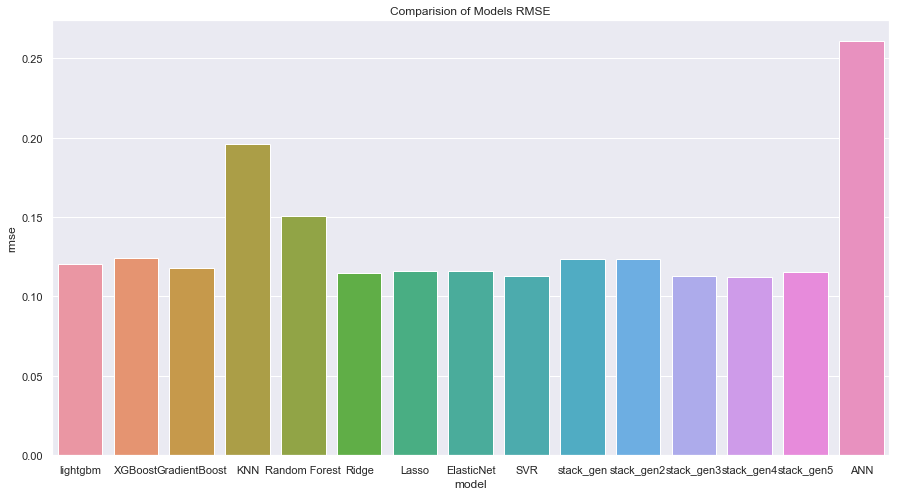

In [582]:
plt.figure(figsize = (15,8))
ax = sns.barplot(x=df_eval.index, y="rmse", data=df_eval)
ax.set_title('Comparision of Models RMSE')
ax.set_xticklabels(chart.get_xticklabels(),rotation=45)